In [29]:
import numpy as np 
import keras 
import cv2 
import tensorflow as tf 

from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense 

import mitdeeplearning as mdl 
import matplotlib.pyplot as plt 

In [7]:
sport = tf.constant("Tennis",tf.string)
number = tf.constant(1.4142,tf.float64)

print("sport is a {}-d Tensor".format(tf.rank(sport).numpy()))
print("number is a {}-d Tensor".format(tf.rank(number).numpy()))

sport is a 0-d Tensor
number is a 0-d Tensor


In [10]:
sport = tf.constant(["Tennis","basketball"],tf.string)
number = tf.constant([3.414 , 1.422, 3.44],tf.float64)

print("sports is a {}-d Tensor".format(tf.rank(sport).numpy(), tf.shape(sport)))
print("number is a {}-d Tensor".format(tf.rank(number).numpy() ,tf.shape(number)))

sports is a 1-d Tensor
number is a 1-d Tensor


In [15]:
## defining higher order tensors 

'''TODO: Define a 2-d Tensor '''
matrix = tf.constant([[2,3,4],[3,4,5],[3,3,3]],tf.float64)

assert isinstance(matrix, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(matrix).numpy() ==2 

print(matrix)

tf.Tensor(
[[2. 3. 4.]
 [3. 4. 5.]
 [3. 3. 3.]], shape=(3, 3), dtype=float64)


In [22]:
'''TODO: Define a 4-d Tensor'''
#use tf.zeros to initialize a 4-d Tensor of zeros with size 10 X 256 X 256 X 3 
# think of it as 10 color imges with size 256 X 256 

images = tf.zeros([10, 256,256,3], tf.int32)

assert isinstance(images, tf.Tensor),"matrix must be a tf Tensor Object"
assert tf.rank(images).numpy() == 4, "matrix must be of rank 4"
assert tf.shape(images).numpy().tolist() == [10,256,256,3],"matrix is incorrect shape"



In [24]:
row_vector = matrix[1]
colomn_vector = matrix[:,2]
scalar = matrix[1,2]

print('row vector : {}'.format(row_vector.numpy()))
print('colomn vector : {}'.format(colomn_vector.numpy()))
print('scalar : {}'.format(scalar.numpy()))

row vector : [3. 4. 5.]
colomn vector : [4. 5. 3.]
scalar : 5.0


In [25]:
## computations on tensor  
a = tf.constant(15)
b = tf.constant(61)

#add them 
c1 = tf.add(a,b)
c2 = a + b
print(c1)
print(c2)

tf.Tensor(76, shape=(), dtype=int32)
tf.Tensor(76, shape=(), dtype=int32)


In [27]:
#defining tensor operations 

def func(a,b):
    c = tf.add(a,b)
    d = tf.subtract(b,1)
    e = tf.multiply(c,d)
    return e

a,b = 1.0 ,5.3

e_out = func(a,b)
print(e_out)

tf.Tensor(27.090002, shape=(), dtype=float32)


In [34]:
## neural network in tensor flow 

#define the number of outputs 
n_output_nodes = 3 

#first define the model 
model = Sequential()

dense_layer = Dense(3, input_shape =(2,), activation = 'relu', kernel_initializer= 'random_normal_initializer')

model.add(dense_layer)

In [35]:
## test teh mdoel with example input 
x_input = tf.constant([[1,2.]], shape=(1,2))

#print(x_input)

model_output = model(x_input)
print(model_output)

tf.Tensor([[0.056167   0.12122293 0.08054844]], shape=(1, 3), dtype=float32)


In [36]:
## gradient computation with gradient tape 

#y = x^2 
# example : x = 3.0 
x = tf.Variable(3.0)

#indicate the gradient tape 
with tf.GradientTape() as tape: 
    #define the function 
    y = x * x

#acess the gradient --derivative of y with respect to x 
dy_dx = tape.gradient(y,x)

assert dy_dx.numpy() == 6.0 

initialization x=[[-1.6543034]]


Text(0, 0.5, 'x value ')

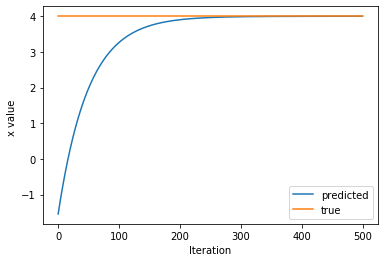

In [38]:
### function minimization with automatic differentiation and SGD 

#initialize a random value for our initial x 
x = tf.Variable([tf.random.normal([1])])
print("initialization x={}".format(x.numpy()))

learning_rate = 1e-2 #learning rate for stocastic gradientdecent
history = []
#define a target value 
x_f = 4 

#we will run SGD for a number of iterations. At each iteration, we compute the loss,
#compute the derivative of the loss with respect to x and perform SGD update 
for i in range(500):
    with tf.GradientTape() as tape: 
        loss = (x - x_f)**2
        
        #loss minimization using gradient tape 
        grad = tape.gradient(loss,x) #capture the gradient wrt x 
        new_x = x - learning_rate*grad 
        x.assign(new_x)
        history.append(x.numpy()[0])
        
#plot the evolution of x as we optimize towards x_f!
plt.plot(history)
plt.plot([0 , 500],[x_f,x_f])
plt.legend(('predicted','true'))
plt.xlabel('Iteration')
plt.ylabel('x value ')